In [46]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#  Preprocesamiento y Modelado
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
import xgboost as xgb

#  Análisis Estadístico
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor



archivo=os.listdir()
archivo

['.ipynb_checkpoints',
 '02_d_Desafío_-_Modelos_de_ensamble__Parte_III_.pdf',
 'Desafío - Enfermedad en la sangre.ipynb',
 'hcvdat0.csv']

In [2]:
df=pd.read_csv('hcvdat0.csv')
df

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,611,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,612,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,613,3=Cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,614,3=Cirrhosis,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


In [3]:
# Limpeiza de datos

In [4]:
# Eliminar la columna 'Unnamed: 0'
df = df.drop(columns=['Unnamed: 0'])

In [5]:
# Eliminar valores Nulos 

In [6]:
df

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,3=Cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,3=Cirrhosis,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


In [7]:
# Categoria de valores 
# Category=’0=Blood Donor’, a la que debes asociar valor 0, y un 1 para los demás valores.
# Mapear la variable 'Category' a una nueva variable binaria 'target'
df['target'] = df['Category'].apply(lambda x: 0 if x == '0=Blood Donor' else 1)

 

In [8]:
df

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,target
0,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0,0
1,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5,0
2,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3,0
3,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7,0
4,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5,1
611,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3,1
612,3=Cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0,1
613,3=Cirrhosis,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0,1


In [9]:
df['Category'].value_counts()

Category
0=Blood Donor             533
3=Cirrhosis                30
1=Hepatitis                24
2=Fibrosis                 21
0s=suspect Blood Donor      7
Name: count, dtype: int64

In [10]:
# Crear la nueva columna 'suspect'
df['suspect'] = df['Category'].apply(lambda x: 1 if x == '0s=suspect Blood Donor' else 0)

# Eliminar la columna 'Category'
df.drop(columns=['Category'], inplace=True)


In [11]:
df

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,target,suspect
0,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0,0,0
1,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5,0,0
2,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3,0,0
3,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7,0,0
4,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5,1,0
611,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3,1,0
612,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0,1,0
613,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0,1,0


In [12]:
df['target'].value_counts() 

target
0    533
1     82
Name: count, dtype: int64

In [13]:
# :/ ... no me gusta, 7 de 615. ¿ Se puede aplicar SMOTE, pese a que el desblance sea tan grande ?

In [14]:
# 🔹 Contar cuántos valores nulos hay en cada columna
total_filas = len(df)  # Número total de filas en el DataFrame

for columna in df.columns:
    valores_nulos = df[columna].isnull().sum()  # Contar valores nulos
    porcentaje_nulos = (valores_nulos / total_filas) * 100  # Calcular porcentaje de valores nulos

    if valores_nulos > 0:  # Solo si hay valores nulos en la columna
        if porcentaje_nulos < 1:
            # 🔹 Si el porcentaje de nulos es menor al 1%, eliminamos esas filas
            df = df.dropna(subset=[columna])
        else:
            # 🔹 Si el porcentaje de nulos es mayor al 1%, rellenamos con la media según la clase 'target'
            for valor_target in df['target'].unique():
                media_por_clase = df.loc[df['target'] == valor_target, columna].mean()
                df.loc[(df['target'] == valor_target) & (df[columna].isnull()), columna] = media_por_clase

# 🔹 Verificar que ya no queden valores nulos
print("Valores nulos después de la limpieza:")
print(df.isnull().sum())

Valores nulos después de la limpieza:
Age        0
Sex        0
ALB        0
ALP        0
ALT        0
AST        0
BIL        0
CHE        0
CHOL       0
CREA       0
GGT        0
PROT       0
target     0
suspect    0
dtype: int64


In [15]:
df

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,target,suspect
0,32,m,38.5,52.500000,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0,0,0
1,32,m,38.5,70.300000,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5,0,0
2,32,m,46.9,74.700000,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3,0,0
3,32,m,43.2,52.000000,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7,0,0
4,32,m,39.2,74.100000,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,62,f,32.0,416.600000,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5,1,0
611,64,f,24.0,102.800000,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3,1,0
612,64,f,29.0,87.300000,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0,1,0
613,46,f,33.0,67.607812,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0,1,0


In [16]:
df['target'].value_counts() 

target
0    533
1     79
Name: count, dtype: int64

# análisis descriptivo para cada variable regresora

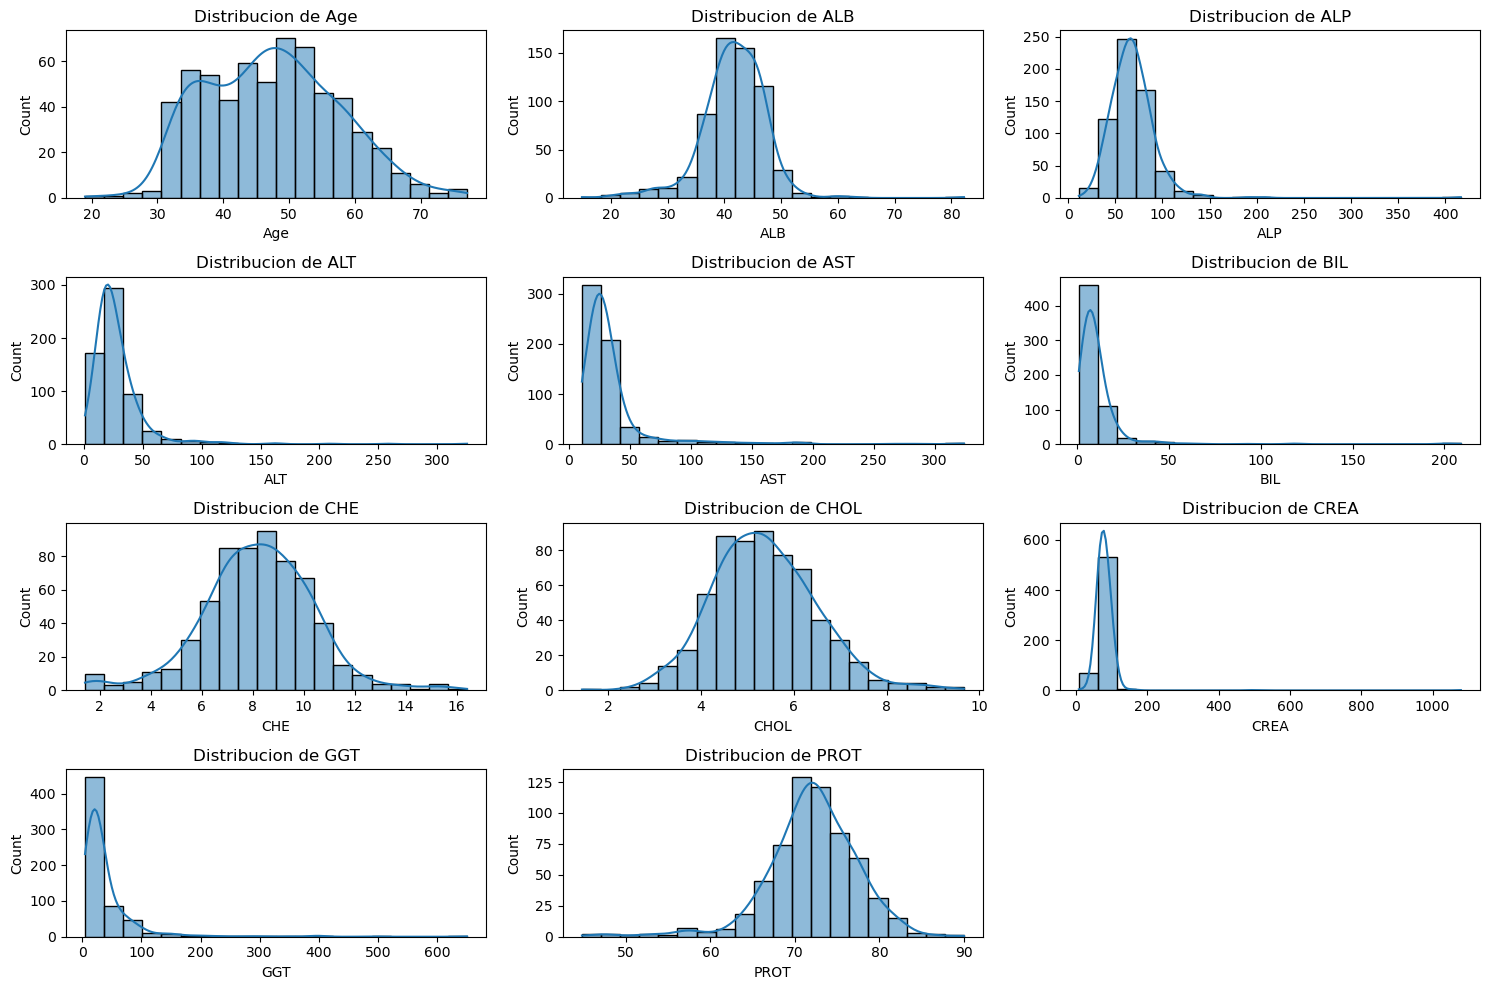

In [18]:
def graficar_distribucion(df, variables_regresoras):


    # Configurar tamaño del gráfico
    plt.figure(figsize=(15, 10))

    # Graficar la distribución de cada variable regresora
    for i, columna in enumerate(variables_regresoras, 1):
        plt.subplot(4, 3, i)  # Crear una cuadrícula de 4 filas y 3 columnas
        sns.histplot(df[columna], kde=True, bins=20)  # Histograma con curva de densidad
        plt.title(f'Distribucion de {columna}')  # Título del gráfico

    plt.tight_layout()  # Ajustar para que no se sobrepongan los gráficos
    plt.show()

variables_regresoras = ['Age', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']
graficar_distribucion(df, variables_regresoras)

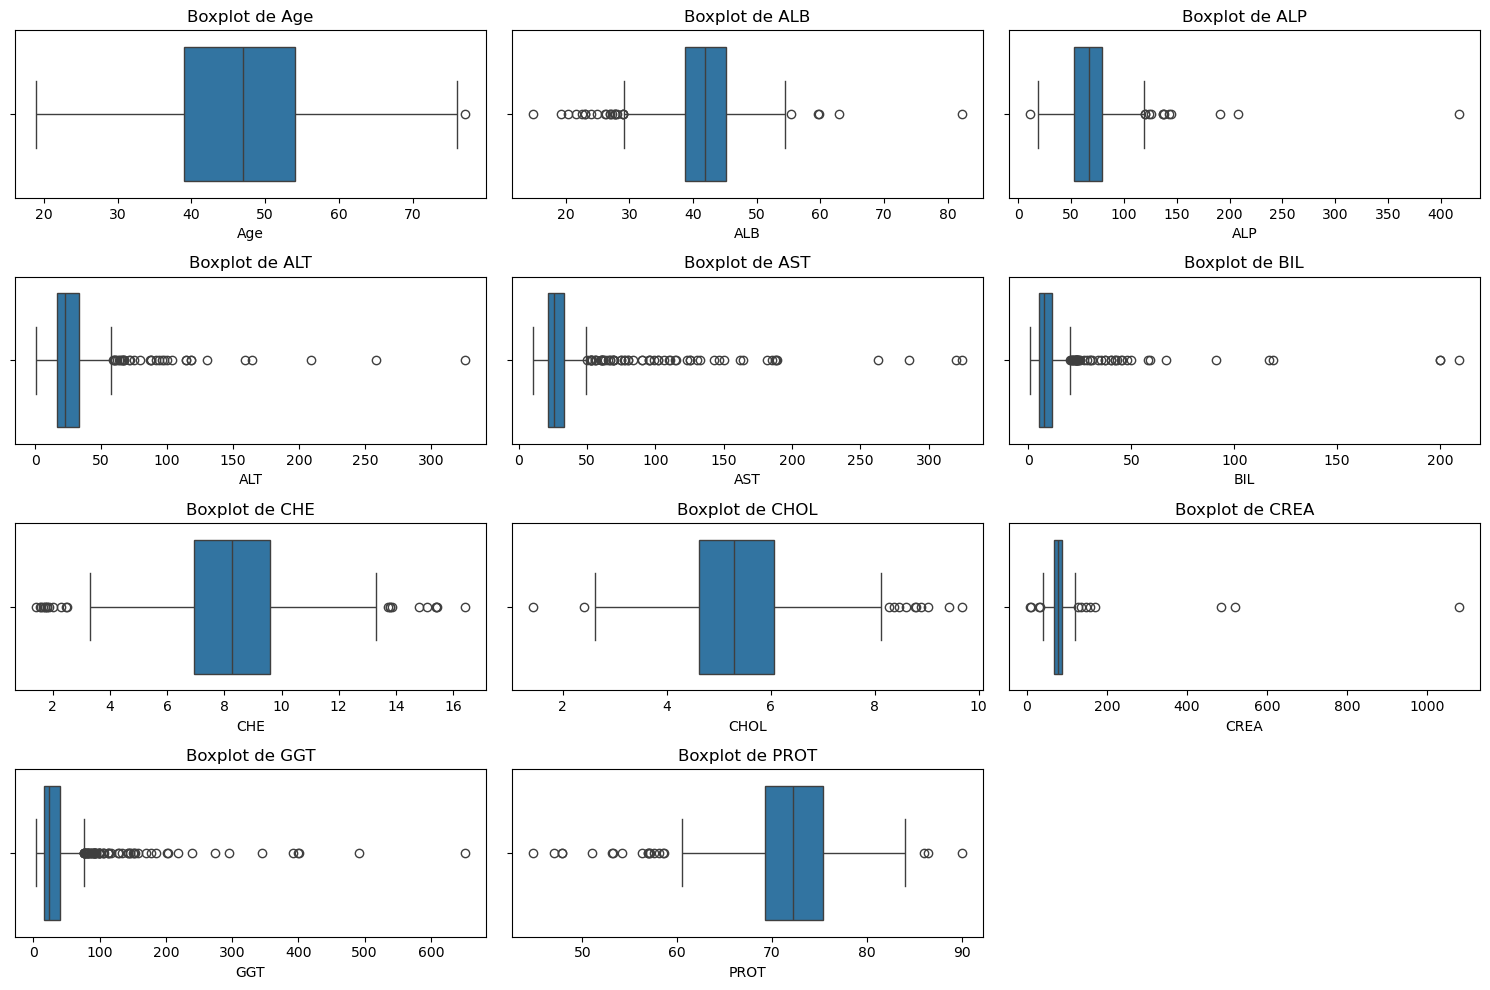

Valores outliers detectados por variable:

Age: [77]
ALB: [29.  27.8 55.4 82.2 28.1 59.7 27.8 62.9 59.8 26.2 27.3 26.3 27.8 22.5
 24.9 21.6 14.9 20.3 19.3 29.  27.  23.  27.  23.  24.  29. ]
ALP: [126.  145.  119.7 137.2 120.2 136.9 124.  208.2 137.8  11.3 143.1 190.7
 416.6]
ALT: [ 97.8 103.6  91.7  96.1  71.7  65.9  87.9  59.8 118.1  70.8  60.3  67.5
  59.1  87.5  66.9  60.4  64.3  75.2  62.1  79.5 208.8 325.3  87.   63.3
  66.  118.  114.  258.  130.   67.1 164.  114.   94.  159.  100. ]
AST: [ 52.6  56.2  60.6  50.  188.7  52.6  52.6  52.3  69.2  77.2 130.6  95.2
 146.6  67.  164.2 187.7  96.2  60.9  53.5  77.6 132.8 324.   63.2 114.4
  83.5 114.7 125.   69.1  62.   75.  106.  187.9  55.9  74.5  90.  161.9
  68.9  70.  125.   60.   60.2 263.1 101.9 102.  185.   66.6 319.8 123.
  80.3 181.8 110.1  65.2  95.4 143.2  90.4  55.7 150.  285.8 110.3  99.
  62.   80. ]
BIL: [ 35.2  24.9  23.4  23.1  45.1  41.9  23.4  45.5  26.9  20.2  33.9  22.6
  23.5  28.3  21.5  24.1  29.8  24.7  20.8  

In [19]:
# Lista de variables regresoras numéricas (excluyendo 'Sex', 'target' y 'suspect' que son categóricas)
variables_regresoras = ['Age', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']

# Configurar tamaño del gráfico
plt.figure(figsize=(15, 10))

# Crear boxplots para cada variable regresora y detectar outliers
outliers = {}

for i, columna in enumerate(variables_regresoras, 1):
    plt.subplot(4, 3, i)  # Crear una cuadrícula de 4 filas y 3 columnas
    sns.boxplot(x=df[columna])  # Boxplot de la variable
    plt.title(f'Boxplot de {columna}')  # Título del gráfico
    
    # Calcular el rango intercuartil (IQR) para detectar outliers
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    
    # Filtrar valores outliers
    outliers_detectados = df[(df[columna] < limite_inferior) | (df[columna] > limite_superior)][columna]
    
    if not outliers_detectados.empty:  # Si hay outliers, guardarlos
        outliers[columna] = outliers_detectados.values

plt.tight_layout()  # Ajustar el layout
plt.show()

# Mostrar los valores outliers detectados
if outliers:
    print("Valores outliers detectados por variable:\n")
    for columna, valores in outliers.items():
        print(f"{columna}: {valores}")
else:
    print("No se detectaron outliers en ninguna variable.")

In [20]:
# Creamos un nuevo dafaframe limpio, sin outliers 

In [21]:
# Crear una copia del DataFrame original antes de eliminar outliers
dataframe_sin_outliers = df.copy() # Hacemos esto por que en el futurio, los valores outlers podrian indicarnos algo o servir de algo

# Eliminar outliers en cada variable numérica usando el método IQR
for columna in variables_regresoras:
    Q1 = dataframe_sin_outliers[columna].quantile(0.25)  # Primer cuartil
    Q3 = dataframe_sin_outliers[columna].quantile(0.75)  # Tercer cuartil
    IQR = Q3 - Q1  # Rango intercuartil
    
    # Definir los límites inferior y superior
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    
    # Filtrar y mantener solo los valores dentro del rango permitido
    dataframe_sin_outliers = dataframe_sin_outliers[
        (dataframe_sin_outliers[columna] >= limite_inferior) & 
        (dataframe_sin_outliers[columna] <= limite_superior)
    ]

# Verificar que los outliers hayan sido eliminados en el nuevo DataFrame
print("Cantidad de datos después de eliminar outliers:", len(dataframe_sin_outliers))

Cantidad de datos después de eliminar outliers: 402


In [22]:
dataframe_sin_outliers # todo: binazrias y analis de dtipó de datos 

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,target,suspect
0,32,m,38.5,52.500000,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0,0,0
1,32,m,38.5,70.300000,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5,0,0
4,32,m,39.2,74.100000,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7,0,0
6,32,m,46.3,41.300000,17.5,17.8,8.5,7.01,4.79,70.0,16.9,74.5,0,0
7,32,m,42.2,41.900000,35.8,31.1,16.1,5.82,4.60,109.0,21.5,67.1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560,33,f,43.0,29.600000,3.8,16.7,6.0,6.88,5.72,58.8,11.5,78.2,1,0
561,41,f,37.0,31.200000,8.2,38.3,7.0,7.08,5.30,60.8,24.7,82.4,1,0
575,64,m,38.0,35.700000,7.1,41.3,13.0,7.10,4.52,70.0,53.0,66.8,1,0
580,68,f,43.0,22.900000,5.0,42.1,12.0,7.29,4.89,80.9,11.9,76.1,1,0


In [23]:
# Ver la estructura del DataFrame
df_info = dataframe_sin_outliers.dtypes

# Ver valores únicos para detectar variables categóricas
unique_values = {col: dataframe_sin_outliers[col].unique()[:10] for col in dataframe_sin_outliers.columns}  # Limitar a 10 valores

# Detectar valores nulos
missing_values = dataframe_sin_outliers.isnull().sum()

# Obtener estadísticas descriptivas
df_describe = dataframe_sin_outliers.describe(include="all")

# Mostrar la estructura del DataFrame
print("Estructura del DataFrame:")
print(df_info, "\n")

# Mostrar los valores únicos de las primeras 10 observaciones
print("Valores Únicos por Columna:")
for col, values in unique_values.items():
    print(f"{col}: {values}")

# Mostrar valores nulos
print("\nValores Nulos por Columna:")
print(missing_values[missing_values > 0], "\n")  # Mostramos solo las columnas con valores nulos

# Mostrar estadísticas descriptivas
print("\nEstadísticas Descriptivas:")
print(df_describe)

Estructura del DataFrame:
Age          int64
Sex         object
ALB        float64
ALP        float64
ALT        float64
AST        float64
BIL        float64
CHE        float64
CHOL       float64
CREA       float64
GGT        float64
PROT       float64
target       int64
suspect      int64
dtype: object 

Valores Únicos por Columna:
Age: [32 33 34 35 36 37 38 39 40 41]
Sex: ['m' 'f']
ALB: [38.5 39.2 46.3 42.2 50.9 44.3 46.4 36.3 39.  38.7]
ALP: [52.5 70.3 74.1 41.3 41.9 65.5 52.3 68.2 78.6 51.7]
ALT: [ 7.7 18.  32.6 17.5 35.8 23.2 21.7 10.3 23.6 15.9]
AST: [22.1 24.7 24.8 17.8 31.1 21.2 22.4 20.  22.  24. ]
BIL: [ 7.5  3.9  9.6  8.5 16.1  6.9 17.2  5.7  7.   6.8]
CHE: [ 6.93 11.17  9.15  7.01  5.82  8.69  4.15  7.36  8.56  6.46]
CHOL: [3.23 4.8  4.32 4.79 4.6  4.1  3.57 4.3  5.38 3.38]
CREA: [106.  74.  76.  70. 109.  83.  78.  79.  65.  63.]
GGT: [12.1 15.6 29.9 16.9 21.5 13.7 24.1 18.7 19.4  7. ]
PROT: [69.  76.5 68.7 74.5 67.1 71.3 75.4 68.6 70.4 71.9]
target: [0 1]
suspect: [0]

V

In [24]:
# Convertir 'Sex' a valores binarios (1 para 'm', 0 para 'f')
dataframe_sin_outliers['Sex'] = dataframe_sin_outliers['Sex'].map({'m': 1, 'f': 0})

# Verificamos la transformación
dataframe_sin_outliers[['Sex']].head()

,Sex
0,1
1,1
4,1
6,1
7,1


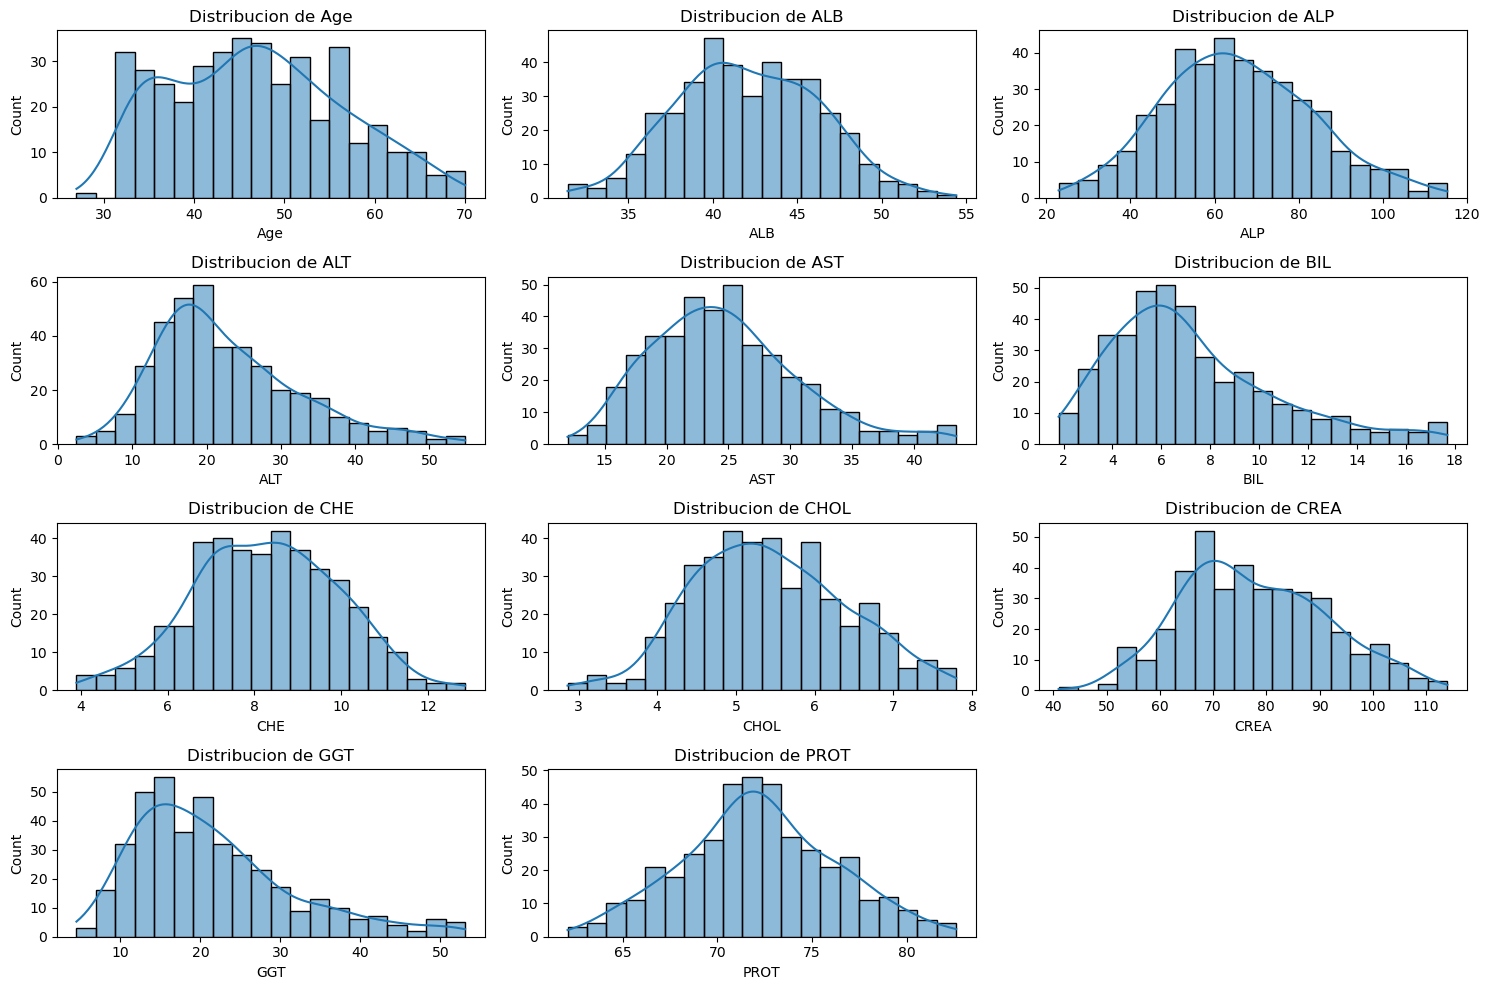

In [25]:
# Ejemplo de uso:
variables_regresoras = ['Age', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']
graficar_distribucion(dataframe_sin_outliers, variables_regresoras)

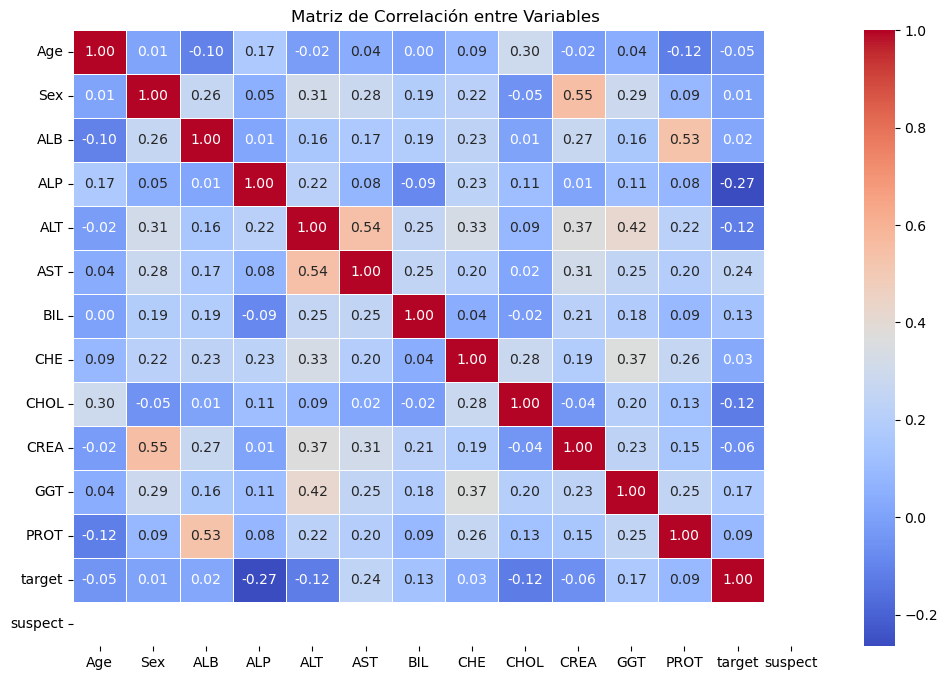

In [26]:
# Seleccionar solo columnas numéricas (excluyendo categóricas)
df_numerico = dataframe_sin_outliers.select_dtypes(include=['number'])

# Calcular la matriz de correlación
correlacion = df_numerico.corr()

# Configurar el tamaño del gráfico
plt.figure(figsize=(12, 8))

# Crear el heatmap con seaborn
sns.heatmap(correlacion, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

# Título del gráfico
plt.title("Matriz de Correlación entre Variables")

# Mostrar el gráfico
plt.show()

# WOW ! muy interesante

# Le pedimos a ChatGPT que haga un analisis para que nos explique la correlacion desde un punto de vista medico, con el fin de poder comprender de mejor manera el dataframe

Relacion entre enzimas hepaticas:

ALT y AST tienen una correlacion positiva moderada (0.54). Esto es esperado, ya que ambas son enzimas relacionadas con la funcion hepatica y el daño en el higado.
GGT y ALT tambien tienen una correlacion moderada (0.42), lo que puede indicar que valores elevados de una pueden estar asociados con un incremento en la otra.
Relacion entre proteinas y albúmina:

ALB y PROT presentan una correlacion de 0.53. La albúmina es una de las principales proteinas producidas por el higado, por lo que su relacion con la proteina total es logica.
Relacion entre edad y colesterol:

CHOL y AGE tienen una correlacion negativa (-0.30), lo que sugiere que los niveles de colesterol pueden disminuir con la edad en este conjunto de datos.
Valores de correlacion bajos en la variable objetivo (target):

No hay una variable numerica que tenga una correlacion fuerte con target. Esto indica que ningun atributo individual es un predictor claro de la condicion del paciente.
Las correlaciones mas cercanas a target son CHE (0.17) y AST (0.24), pero siguen siendo bajas, lo que sugiere que es necesario un enfoque de machine learning mas complejo para predecir correctamente las categorias.
Deteccion de posibles patrones clinicos:

BIL y AST tienen una correlacion moderada (0.25). Dado que la bilirrubina alta puede estar asociada con enfermedades hepaticas, su relacion con una enzima como AST podria ser un indicador importante para analisis medicos.

In [28]:
# SMOTE DE DATOS ! 
# Dado 

dataframe_sin_outliers['target'].value_counts() 


target
0    393
1      9
Name: count, dtype: int64

In [29]:
dataframe_sin_outliers

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,target,suspect
0,32,1,38.5,52.500000,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0,0,0
1,32,1,38.5,70.300000,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5,0,0
4,32,1,39.2,74.100000,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7,0,0
6,32,1,46.3,41.300000,17.5,17.8,8.5,7.01,4.79,70.0,16.9,74.5,0,0
7,32,1,42.2,41.900000,35.8,31.1,16.1,5.82,4.60,109.0,21.5,67.1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560,33,0,43.0,29.600000,3.8,16.7,6.0,6.88,5.72,58.8,11.5,78.2,1,0
561,41,0,37.0,31.200000,8.2,38.3,7.0,7.08,5.30,60.8,24.7,82.4,1,0
575,64,1,38.0,35.700000,7.1,41.3,13.0,7.10,4.52,70.0,53.0,66.8,1,0
580,68,0,43.0,22.900000,5.0,42.1,12.0,7.29,4.89,80.9,11.9,76.1,1,0


# APLICAMOS SMOTE 

In [31]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Simulamos un dataset con nombres de características
np.random.seed(42)
X = np.random.randn(1000, 10)  # 1000 muestras, 10 características
y = np.random.randint(0, 2, size=1000)  # Variable objetivo binaria

# Separar en conjunto de entrenamiento y prueba (67% - 33%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

# Aplicar SMOTE solo en el conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Mostrar tamaños antes y después de SMOTE
print("Tamaño del conjunto de entrenamiento antes de SMOTE:", X_train.shape, y_train.shape)
print("Tamaño del conjunto de entrenamiento después de SMOTE:", X_train_resampled.shape, y_train_resampled.shape)


Tamaño del conjunto de entrenamiento antes de SMOTE: (670, 10) (670,)
Tamaño del conjunto de entrenamiento después de SMOTE: (674, 10) (674,)


# Modelo regresión logística con validación cruzada 

In [48]:

#  Cargamos los datos reales
X = df_sin_outliers.drop(columns=['target'])  # Variables predictoras
y = df_sin_outliers['target']  # Variable objetivo

#  Convertimos la variable 'Sex' en numérica
X['Sex'] = X['Sex'].map({'m': 1, 'f': 0})

#  Aplicamos SMOTE para balancear las clases
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

#  Dividimos en entrenamiento y prueba (70% - 30%)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled)

#  Normalizamos los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#  Definimos la Regresión Logística con regularización Elastic Net
log_reg = LogisticRegression(penalty='elasticnet', solver='saga', max_iter=5000, random_state=42)

#  Definimos la validación cruzada con 5 folds
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#  Definimos la grilla de hiperparámetros más reducida para optimización
param_grid = {
    'C': np.linspace(0.01, 2.0, 50),  # Rango más pequeño para evitar overfitting
    'l1_ratio': np.linspace(0, 1, 20)  # Valores entre 0 (Ridge) y 1 (Lasso)
}

#  Búsqueda en grilla con validación cruzada
grid_search = GridSearchCV(log_reg, param_grid, cv=cv, scoring='f1', n_jobs=-1, verbose=1)
grid_search.fit(X_train_scaled, y_train)

#  Obtenemos los mejores hiperparámetros
best_params = grid_search.best_params_

#  Evaluamos el modelo con los mejores hiperparámetros
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

#  Calculamos métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

#  Identificamos las tres características con mayor incidencia
feature_importance = np.abs(best_model.coef_).flatten()
top_features_idx = np.argsort(feature_importance)[-3:]  # Extraemos los índices de las 3 más importantes
top_features = [(X.columns[idx], feature_importance[idx]) for idx in top_features_idx]  # Asociamos con nombres

#  Mostramos resultados corregidos
print("Mejores Hiperparámetros:", best_params)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("\nTop 3 características más importantes:")
for feature, importance in reversed(top_features):  # Mostramos de mayor a menor importancia
    print(f"{feature}: {importance:.4f}")

#  Calculamos la Matriz de Confusión
cf_matrix = confusion_matrix(y_test, y_pred)

#  Mostramos la matriz de confusión y las métricas de evaluación
print("\n Matriz de Confusión:")
print(cf_matrix)


Fitting 5 folds for each of 1000 candidates, totalling 5000 fits
Mejores Hiperparámetros: {'C': 0.3348979591836735, 'l1_ratio': 0.0}
Accuracy: 0.9625
Precision: 0.9868
Recall: 0.9375
F1-Score: 0.9615

Top 3 características más importantes:
AST: 2.8451
GGT: 2.4542
ALP: 1.6728

🔹 Matriz de Confusión:
[[158   2]
 [ 10 150]]


Resumen de Errores y Soluciones
Error	Causa	Consecuencia	Solución
 SMOTE no aplicado antes de dividir datos	SMOTE estaba comentado o mal aplicado	Datos desbalanceados, coeficientes 0	Aplicar SMOTE antes de dividir los datos
 Validación cruzada con datos no escalados	GridSearchCV entrenaba con datos sin normalizar	Modelo inestable, coeficientes incorrectos	Escalar datos antes de validación cruzada
 Rango de hiperparámetros demasiado amplio	C y l1_ratio mal ajustados	Sobreajuste, recall 1.0, precision 0.5	Reducir el rango de C y l1_ratio
 Coeficientes 0 en todas las variables	Regularización excesiva	Modelo sin predicción útil	Ajustar hiperparámetros y validar coeficientes

# Modelo de Clasificacion Clasico 

In [66]:

#  Usamos el DataFrame original
df_sin_outliers = df.copy()  # Aseguramos que no estamos modificando el original

#  Definimos la variable objetivo y las características
Y = df_sin_outliers['target']  # Asegurar que no tiene NaN

features = ['Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE',
            'CHOL', 'CREA', 'GGT', 'PROT']

X = df_sin_outliers[features].copy()  # Evita SettingWithCopyWarning

#  Convertimos 'Sex' en numérico de forma segura
X.loc[:, 'Sex'] = X['Sex'].map({'m': 1, 'f': 0})

#  Eliminar o reemplazar valores nulos e infinitos
X.replace([np.inf, -np.inf], np.nan, inplace=True)  # Reemplazamos inf por NaN
X.dropna(inplace=True)  # Eliminamos filas con NaN
Y = Y.loc[X.index]  # Ajustamos Y para que coincida con las filas de X

#  Verificación final de valores nulos o infinitos
print("\nVerificación final:")
print(X.isnull().sum().sum(), "valores NaN restantes en X")
print(np.isinf(X).sum().sum(), "valores infinitos restantes en X")

#  Análisis de importancia de regresores con Árbol de Decisión
dt = DecisionTreeClassifier(random_state=15, criterion='entropy', max_depth=10)
dt.fit(X, Y)

importancia = pd.DataFrame({
    'columna': dt.feature_names_in_,
    'importancia': dt.feature_importances_
}).sort_values('importancia', ascending=False)

print("\n Importancia de Características:")
print(importancia)

#  Ajustamos el modelo de regresión logística con statsmodels
X_const = sm.add_constant(X)  # Añadir constante para el intercepto
modelo_logit = sm.Logit(Y, X_const).fit()
print("\n Resumen del Modelo Logit:")
print(modelo_logit.summary())

#  División de datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0, train_size=2/3)

#  Escalado de características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#  Modelo de Regresión Logística con sklearn
regresion = LogisticRegression()
regresion.fit(X_train, y_train)

#  Generación de predicciones
prediccion = regresion.predict(X_test)

# atriz de confusión y Accuracy
cf = confusion_matrix(y_test, prediccion)
accuracy = accuracy_score(y_test, prediccion)

#  Mostrar resultados
print("\n Matriz de Confusión:")
print(cf)
print(f"\n Accuracy: {accuracy:.4f}")

# Calcular métricas
precision = precision_score(y_test, prediccion, average="binary")
recall = recall_score(y_test, prediccion, average="binary")
f1 = f1_score(y_test, prediccion, average="binary")

# average="binary" en funciones como precision_score, recall_score y f1_score indica que el 
# cálculo se realiza para problemas de clasificación binaria. Esto es útil cuando tu variable objetivo (y_test) solo tiene dos clases (por ejemplo, 0 y 1).


# Mostrar los resultados
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")



Verificación final:
0 valores NaN restantes en X
0 valores infinitos restantes en X

 Importancia de Características:
   columna  importancia
5      AST     0.564470
4      ALT     0.197399
3      ALP     0.057975
2      ALB     0.056838
6      BIL     0.043016
10     GGT     0.035424
9     CREA     0.020157
8     CHOL     0.015923
1      Sex     0.008798
0      Age     0.000000
7      CHE     0.000000
11    PROT     0.000000
Optimization terminated successfully.
         Current function value: 0.110890
         Iterations 9

 Resumen del Modelo Logit:
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  612
Model:                          Logit   Df Residuals:                      599
Method:                           MLE   Df Model:                           12
Date:                Mon, 17 Feb 2025   Pseudo R-squ.:                  0.7117
Time:                        16:33:46   Log-

C:\Users\franc\AppData\Local\Temp\ipykernel_2656\1284191365.py:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X.replace([np.inf, -np.inf], np.nan, inplace=True)  # Reemplazamos inf por NaN


# Modelo Extreme Gradient Boosting 

In [73]:

# Generamos un dataset simulado para clasificación
X, y = make_classification(n_samples=1000, n_features=10, random_state=42)

# Dividimos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Aplicamos SMOTE para balancear solo el conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Normalizamos los datos (usamos solo `fit` en el conjunto de entrenamiento)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Definimos el clasificador XGBoost
xgb_clf = xgb.XGBClassifier(objective="binary:logistic", use_label_encoder=False, eval_metric="logloss")

# Definimos la validación cruzada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Definimos la grilla de hiperparámetros
param_grid = {
    'reg_lambda': np.linspace(0.0, 2.0, 10),  # Regularización L2
    'reg_alpha': np.linspace(0.0, 1.0, 10),  # Regularización L1
    'learning_rate': np.linspace(0.1, 10, 20)  # Tasa de aprendizaje
}

# Búsqueda en grilla con validación cruzada (ahora usamos los datos SMOTE)
grid_search = GridSearchCV(xgb_clf, param_grid, cv=cv, scoring='f1', n_jobs=-1, verbose=1)
grid_search.fit(X_train_scaled, y_train_resampled)  # Ahora entrena con datos balanceados

# Extraemos los mejores hiperparámetros
best_params = grid_search.best_params_

# Evaluamos el modelo con los mejores hiperparámetros
best_model = grid_search.best_estimator_

# Predecimos sobre el conjunto de prueba, no el de entrenamiento
y_pred = best_model.predict(X_test_scaled)

# Calculamos métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Mostramos resultados
print("Mejores Hiperparámetros:", best_params)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

#  Calculamos la Matriz de Confusión
cf_matrix = confusion_matrix(y_test, y_pred)

#  Mostramos la matriz de confusión y las métricas de evaluación
print("\n Matriz de Confusión:")
print(cf_matrix)


Fitting 5 folds for each of 2000 candidates, totalling 10000 fits


C:\Users\franc\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:42:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Mejores Hiperparámetros: {'learning_rate': 0.1, 'reg_alpha': 0.2222222222222222, 'reg_lambda': 1.7777777777777777}
Accuracy: 0.9067
Precision: 0.9552
Recall: 0.8533
F1-Score: 0.9014

 Matriz de Confusión:
[[144   6]
 [ 22 128]]


# Conclusion Final 

La mejor opción sigue siendo la Regresión Logística con Elastic Net (sklearn), porque:

Mayor Accuracy (96.25%), lo que significa menos errores generales.
Mayor Recall (93.75%), lo que indica que detecta casi todos los casos positivos.
Mayor Precisión (98.68%), lo que significa que rara vez predice un positivo por error.
Mejor F1-Score (96.15%), equilibrio ideal entre precisión y recall.
La Regresión Logística con Statsmodels también es buena, pero tiene un recall bajo (70.00%), lo que significa que deja pasar más casos positivos sin detectar.

XGBoost tiene el peor desempeño en este caso:

Su recall (85.33%) es mejor que el de Statsmodels, pero sigue por debajo de Elastic Net.
Tiene más falsos negativos (22), lo que puede ser un problema en un contexto de salud.
